In [3]:
import requests
from pprint import pprint

endpoint = "https://azure-openai-7ai-050.openai.azure.com/openai/deployments/gpt-4o-mini/chat/completions?api-version=2025-01-01-preview"

headers = {
    "Content-Type": "application/json",
    "api-key": "",
}

payload = {
    "messages": [{"role": "system", "content": "You are a helpful assistant."}],
    "temperature": 0.8,
    "top_p": 0.95,
    "max_tokens": 800,
}

user_message = [
    {
        "role": "user",
        "content": [{"type": "text", "text": "What is the capital of France?"}],
    },
]

payload["messages"].extend(user_message)

pprint(payload)

response = requests.post(
    endpoint,
    headers=headers,
    json=payload,
)

response_json = response.json()

pprint(response.status_code)
pprint(response.text)
pprint(response.content)
pprint(response_json["choices"][0]["message"]["content"])


{'max_tokens': 800,
 'messages': [{'content': 'You are a helpful assistant.', 'role': 'system'},
              {'content': [{'text': 'What is the capital of France?',
                            'type': 'text'}],
               'role': 'user'}],
 'temperature': 0.8,
 'top_p': 0.95}
200
('{"choices":[{"content_filter_results":{"hate":{"filtered":false,"severity":"safe"},"protected_material_code":{"filtered":false,"detected":false},"protected_material_text":{"filtered":false,"detected":false},"self_harm":{"filtered":false,"severity":"safe"},"sexual":{"filtered":false,"severity":"safe"},"violence":{"filtered":false,"severity":"safe"}},"finish_reason":"stop","index":0,"logprobs":null,"message":{"annotations":[],"content":"The '
 'capital of France is '
 'Paris.","refusal":null,"role":"assistant"}}],"created":1750234850,"id":"chatcmpl-BjiKIExxFNpoWak9E009WHWe7RdKl","model":"gpt-4o-mini-2024-07-18","object":"chat.completion","prompt_filter_results":[{"prompt_index":0,"content_filter_results"

In [4]:
def request_openai(messages: list[dict], temperature: float = 0.8, top_p: float = 0.95, max_tokens: int = 800):
    endpoint = "https://azure-openai-7ai-050.openai.azure.com/openai/deployments/gpt-4o-mini/chat/completions?api-version=2025-01-01-preview"

    headers = {
        "Content-Type": "application/json",
        "api-key": "",
    }

    payload = {
        "messages": messages,
    }

    response = requests.post(endpoint, headers=headers, json=payload)

    return response.json()["choices"][0]["message"]["content"]

def user_message(message: str):
    return [{"role": "user", "content": [{"type": "text", "text": message}]}]

def system_message(message: str):
    return [{"role": "system", "content": [{"type": "text", "text": message}]}]

def assistant_message(message: str):
    return [{"role": "assistant", "content": [{"type": "text", "text": message}]}]

def chat_prompt(messages: list[dict]):
    return [
        *system_message("You are a helpful assistant."),
        *messages,
    ]


request_openai(chat_prompt(user_message("체리에 대해서 설명해줘")))

"체리(Cherry)는 장미과에 속하는 과일로, 속씨식물인 체리나무에서 자생하는 열매입니다. 체리는 일반적으로 빨간색 또는 검은색의 둥근 형태로, 달고 상큼한 맛이 특징입니다. 체리는 세계 여러 지역에서 재배되며, 주로 북반구의 온대 지역에서 생산됩니다.\n\n### 체리의 종류\n체리는 크게 두 가지 주요 종류로 나눌 수 있습니다:\n\n1. **단체리(Sweet Cherry)**: 주로 신선하게 먹거나 디저트에 사용됩니다. 대표적인 품종으로는 '바링(Golden Rain)'과 '레피토스(Rainier)'가 있습니다.\n\n2. **신체리(Sour Cherry)**: 주로 요리나 잼, 주스 등의 가공식품에 사용됩니다. 대표적인 품종으로는 '바르베타(Bing)'와 '모레(Sour)'가 있습니다.\n\n### 영양소와 건강 효능\n체리는 비타민 C, 칼륨, 항산화 물질이 풍부하여 건강에 많은 이점을 제공합니다. 주요 효능으로는:\n\n- **항산화 작용**: 체리에는 안토시아닌과 같은 항산화 물질이 풍부하여 세포 손상을 줄이는 데 도움을 줍니다.\n- **항염 효과**: 체리 섭취는 체내 염증을 줄이는 데 도움을 줄 수 있습니다.\n- **수면 촉진**: 체리는 멜라토닌의 자연적인 공급원으로, 수면의 질을 향상시키는 데 기여할 수 있습니다.\n\n### 체리의 재배\n체리는 차가운 겨울과 따뜻한 여름이 있는 기후에서 잘 자랍니다. 체리 나무는 일반적으로 3-4년 후부터 열매를 맺기 시작하며, 재배 시 적절한 배수와 햇빛이 중요합니다. 꽃이 핀 후 열매는 여름에 수확할 수 있습니다.\n\n### 체리의 활용\n체리는 신선하게 섭취할 수 있을 뿐만 아니라, 잼, 주스, 아이스크림, 케이크 등 다양한 가공 제품에 사용됩니다.\n\n체리는 특유의 맛과 색상 덕분에 많은 사람들에게 사랑받는 과일 중 하나입니다."

In [5]:
import os
import base64
from openai import AzureOpenAI

endpoint = os.getenv("ENDPOINT_URL", "https://azure-openai-7ai-050.openai.azure.com/")
deployment = os.getenv("DEPLOYMENT_NAME", "gpt-4o-mini")
subscription_key = os.getenv("AZURE_OPENAI_API_KEY", "")

# Initialize Azure OpenAI client with key-based authentication
client = AzureOpenAI(
    azure_endpoint=endpoint,
    api_key=subscription_key,
    api_version="2025-01-01-preview",
)

# IMAGE_PATH = "YOUR_IMAGE_PATH"
# encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')

# Prepare the chat prompt
messages = chat_prompt(user_message("체리에 대해서 설명해줘"))

# Generate the completion
completion = client.chat.completions.create(
    model=deployment,
    messages=messages,
    max_tokens=800,
    temperature=0.7,
    top_p=0.95,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None,
    stream=False,
)

pprint(completion.choices[0].message.content)

('체리는 작은 과일로, 주로 여름철에 수확됩니다. 체리는 주로 두 가지 주요 종류로 나뉘어지는데, 단맛이 나는 달콤한 체리와 신맛이 나는 '
 '신체리가 있습니다. \n'
 '\n'
 '### 체리의 주요 특징:\n'
 '\n'
 '1. **종류**:\n'
 "   - **달콤한 체리**: 대표적으로 '비링 체리'와 '레니 체리'가 있습니다. 이들은 신선하게 먹거나 디저트에 많이 사용됩니다.\n"
 "   - **신체리**: '서머 체리'나 '타르트 체리'가 있으며, 주로 잼, 파이, 소스 등으로 가공됩니다.\n"
 '\n'
 '2. **영양소**:\n'
 '   - 체리는 비타민 C, 비타민 A, 칼륨, 그리고 항산화 물질인 안토시아닌이 풍부하여 건강에 이로운 영향을 미칩니다. 항산화 물질은 '
 '노화 방지와 염증 감소에 도움을 줄 수 있습니다.\n'
 '\n'
 '3. **재배**:\n'
 '   - 체리는 온대 기후에서 잘 자라며, 잘 배수된 토양과 충분한 햇빛이 필요합니다. 주로 북반구의 여러 나라에서 재배됩니다.\n'
 '\n'
 '4. **용도**:\n'
 '   - 생으로 먹는 것 외에도, 체리는 잼, 주스, 파이, 샐러드, 아이스크림 등의 다양한 요리에 활용됩니다. 또한, 체리의 씨앗은 '
 '오일로 가공되기도 합니다.\n'
 '\n'
 '5. **건강 효과**:\n'
 '   - 체리는 항산화 작용 덕분에 심장 건강에 좋고, 수면 개선, 운동 후 회복에도 도움을 줄 수 있다고 알려져 있습니다.\n'
 '\n'
 '체리는 맛뿐만 아니라 다양한 건강 효능으로 많은 사람들에게 사랑받는 과일입니다.')


In [6]:
import os

def request_openai_using_openai_sdk(messages: list[dict], temperature: float = 0.8, top_p: float = 0.95, max_tokens: int = 800):
    endpoint = os.getenv("ENDPOINT_URL", "https://azure-openai-7ai-050.openai.azure.com/")
    deployment = os.getenv("DEPLOYMENT_NAME", "gpt-4o-mini")
    subscription_key = os.getenv("AZURE_OPENAI_API_KEY", "")

    # Initialize Azure OpenAI client with key-based authentication
    client = AzureOpenAI(
        azure_endpoint=endpoint,
        api_key=subscription_key,
        api_version="2025-01-01-preview",
    )

    response = client.chat.completions.create(
        model=deployment,
        messages=messages,
        temperature=temperature,
        top_p=top_p,
        max_tokens=max_tokens,
    )

    return response.choices[0].message.content


request_openai_using_openai_sdk(chat_prompt(user_message("체리에 대해서 설명해줘")))

'체리는 대표적인 과일 중 하나로, 쨍한 빨간색이나 검은색의 작은 둥글고 단단한 열매입니다. 체리는 주로 두 가지 종류로 나뉩니다: 달콤한 체리(Prunus avium)와 신 체리(Prunus cerasus)입니다.\n\n### 체리의 특징\n1. **영양 성분**: 체리는 비타민 C, 비타민 A, 식이섬유, 항산화 물질인 안토시아닌이 풍부하여 건강에 많은 이점을 제공합니다.\n2. **맛과 식감**: 달콤한 체리는 육즙이 많고 달콤하며, 신 체리는 신맛이 강해 잼이나 파이, 디저트에 주로 사용됩니다.\n3. **재배**: 체리는 온대 지역에서 자생하며, 미국, 터키, 이란 등이 주요 생산국입니다. 체리 나무는 차가운 겨울을 필요로 하고, 봄철에 꽃을 피운 후 여름에 열매를 맺습니다.\n\n### 건강 효능\n- **항산화 효과**: 체리는 항산화 물질이 풍부해 체내의 자유 라디칼을 제거하고 노화 방지에 도움을 줄 수 있습니다.\n- **항염증 효과**: 체리는 염증을 줄이고 통증 완화에 도움을 줄 수 있는 성분을 포함하고 있습니다.\n- **수면 개선**: 체리에는 멜라토닌이 포함되어 있어 수면 질 개선에도 기여할 수 있습니다.\n\n### 소비 방법\n체리는 생으로 먹거나, 요리, 디저트, 잼, 주스 등 다양한 형태로 소비할 수 있습니다. 특히 여름철에 인기가 많으며, 신선한 체리를 맛보는 것이 가장 좋습니다.\n\n체리는 그 자체로도 맛있지만, 여러 요리와 함께 조화롭게 어울려 다양한 요리로 즐길 수 있는 과일입니다.'

[{'content': [{'text': 'You are a helpful assistant.', 'type': 'text'}],
  'role': 'system'},
 {'content': [{'text': '다음 이미지를 읽고 일부 코드에 대한 설명을 진행해줘', 'type': 'text'}],
  'role': 'user'},
 {'content': [{'image_url': {'url': ''},
               'type': 'image_url'}],
  'role': 'user'}]
('주어진 이미지에서, 파이썬 코드와 Mercari Recommender API 문서의 일부가 보입니다. 아래에서 코드를 중심으로 '
 '설명하겠습니다.\n'
 '\n'
 '### 코드 분석\n'
 '\n'
 '1. **라우터 설정**:\n'
 '   ```python\n'
 '   @router.get("/recommendations", ...)\n'
 '   ```\n'
 '   이 코드는 FastAPI의 라우터를 사용하여 HTTP GET 요청을 처리하는 엔드포인트를 정의합니다. '
 '`/recommendations` 경로로 GET 요청이 들어오면 `get_recommendations` 함수가 호출됩니다.\n'
 '\n'
 '2. **세션 관리**:\n'
 '   ```python\n'
 '   db: Session = Depends(get_db)\n'
 '   ```\n'
 '   이 부분은 데이터베이스 세션을 가져오는 의존성을 정의합니다. `get_db` 함수는 데이터베이스와의 연결을 관리하는 역할을 하며, '
 'FastAPI의 의존성 주입 시스템을 통해 자동으로 호출됩니다.\n'
 '\n'
 '3. **유저 ID 확인**:\n'
 '   ```python\n'
 '   if "user_id" not in request.session:\n'
 '       request.session["user_id"] = str(uuid.uuid4())\n'
 '
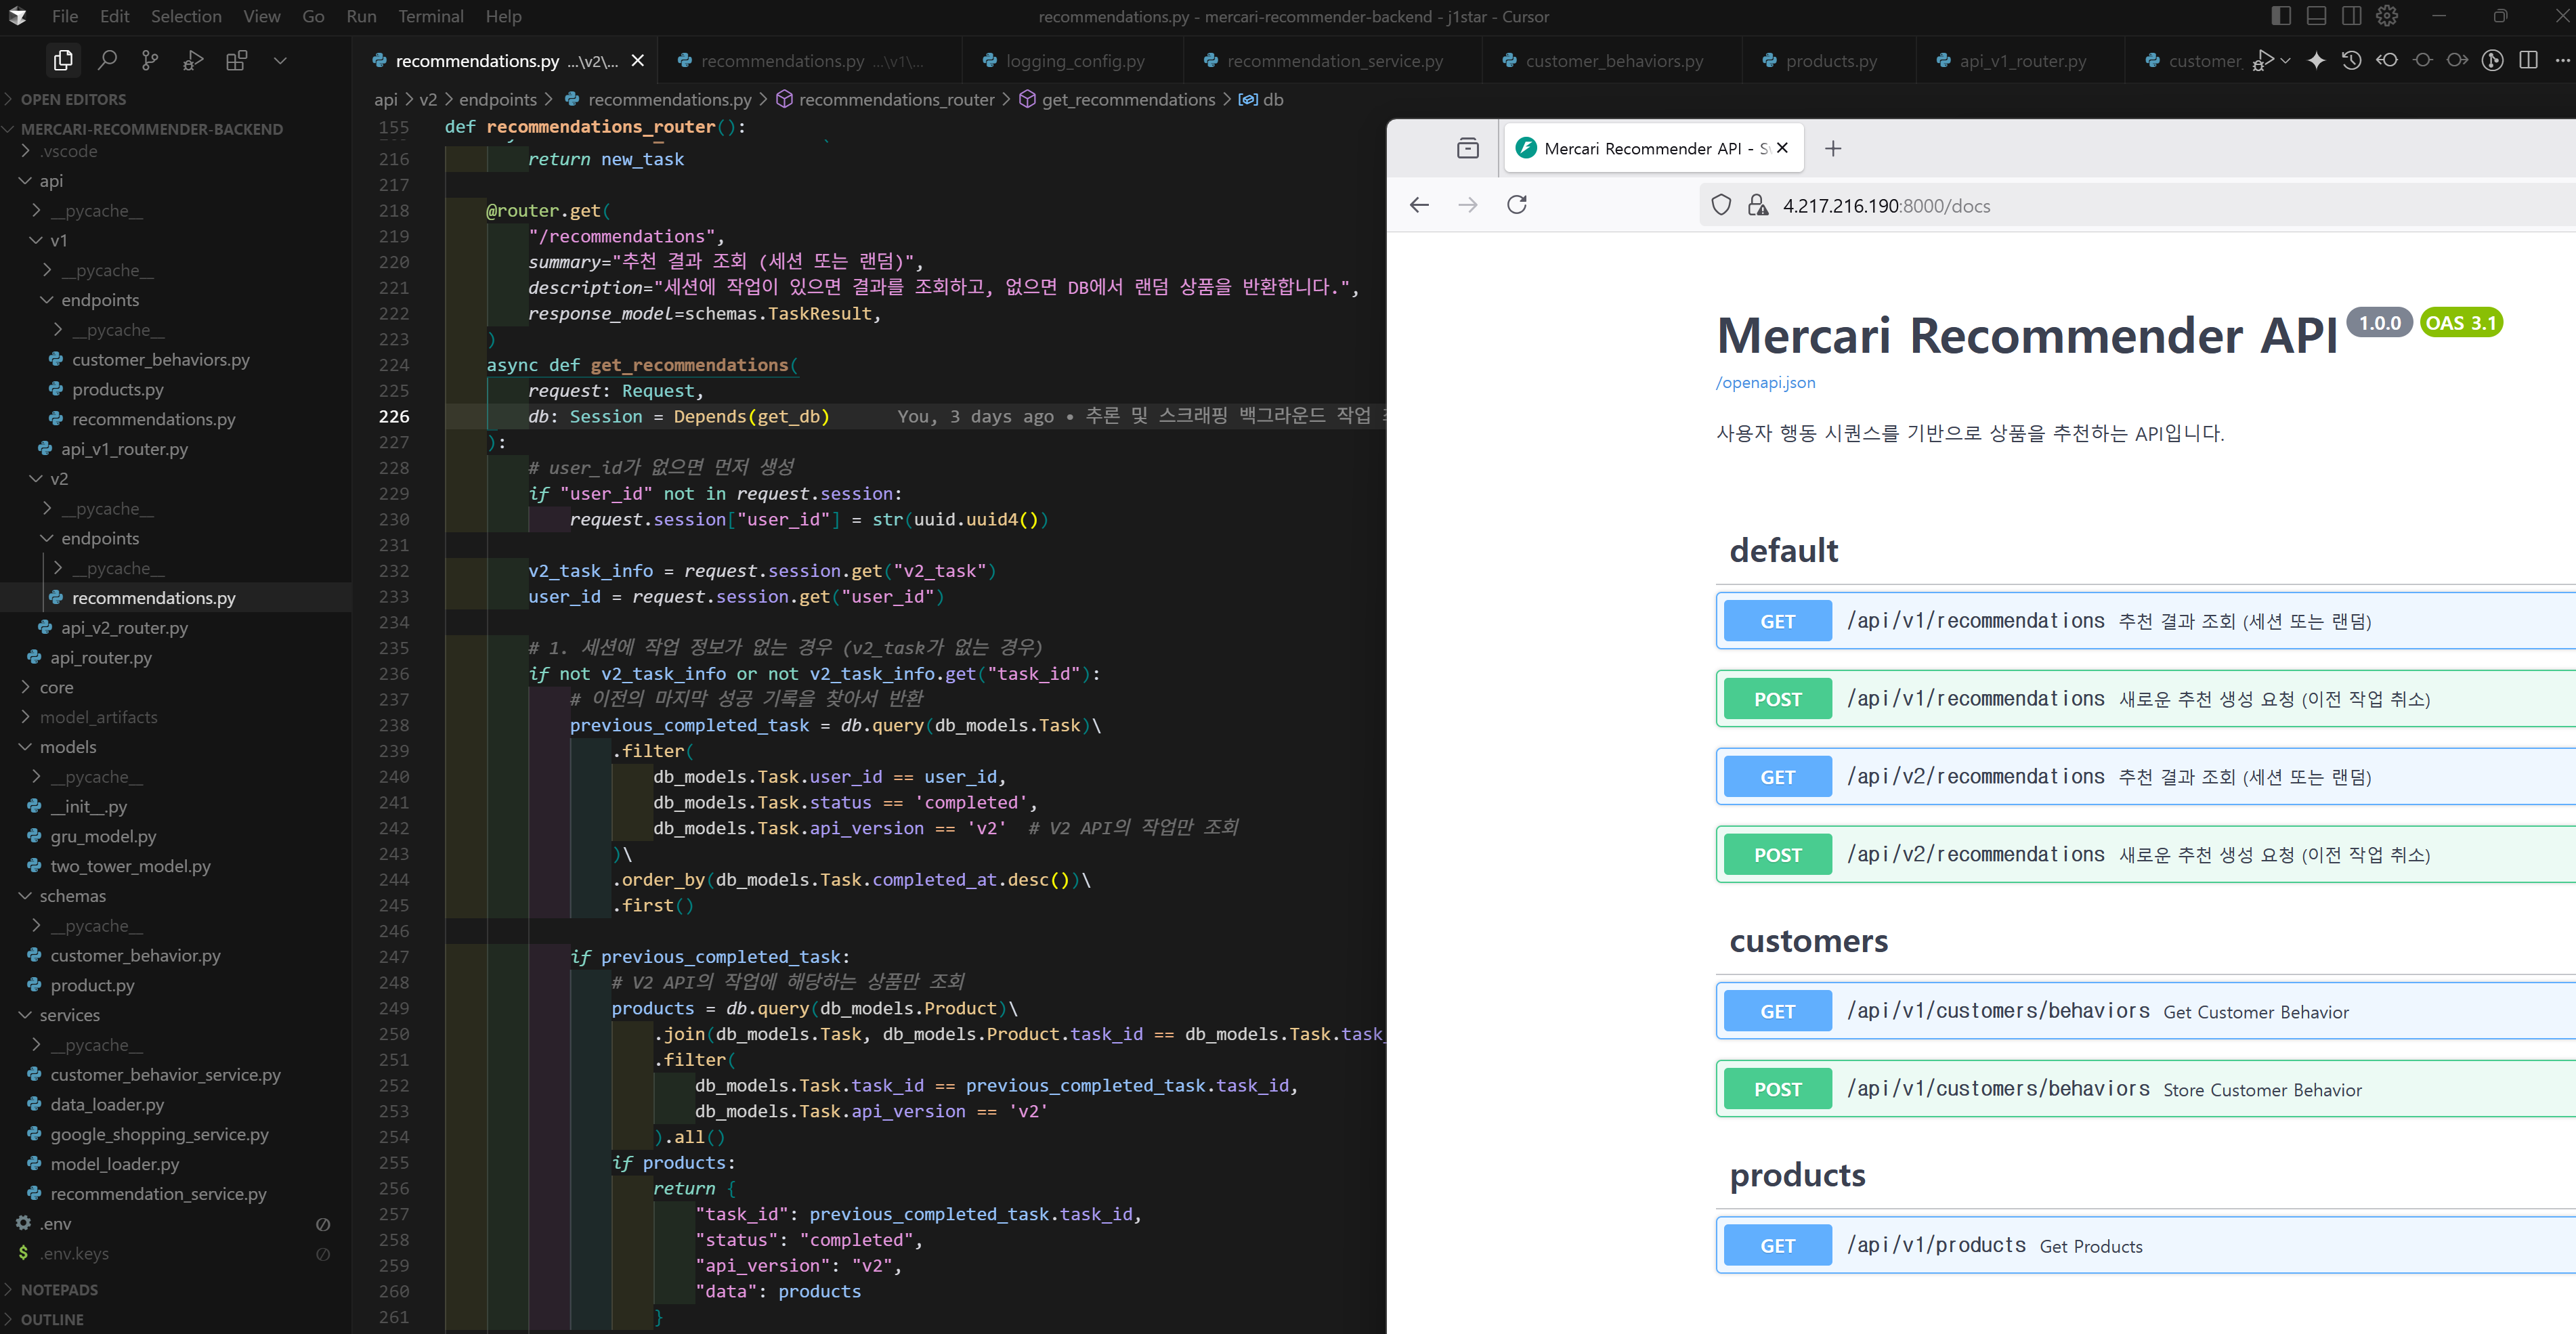

In [12]:
import os
import base64


def request_openai_with_image_using_openai_sdk(
    messages: list[dict],
    image_path: str,
    temperature: float = 0.8,
    top_p: float = 0.95,
    max_tokens: int = 800,
):
    endpoint = os.getenv(
        "ENDPOINT_URL", "https://azure-openai-7ai-050.openai.azure.com/"
    )
    deployment = os.getenv("DEPLOYMENT_NAME", "gpt-4o-mini")
    subscription_key = os.getenv(
        "AZURE_OPENAI_API_KEY",
        "",
    )

    if image_path:
        image_base64 = base64.b64encode(open(image_path, "rb").read()).decode("ascii")
        messages.append(
            {
                "content": [
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/png;base64,{image_base64}"},
                    }
                ],
                "role": "user",
            }
        )

    pprint(messages)

    # Initialize Azure OpenAI client with key-based authentication
    client = AzureOpenAI(
        azure_endpoint=endpoint,
        api_key=subscription_key,
        api_version="2025-01-01-preview",
    )

    response = client.chat.completions.create(
        model=deployment,
        messages=messages,
        temperature=temperature,
        top_p=top_p,
        max_tokens=max_tokens,
    )

    return response.choices[0].message.content


pprint(
    request_openai_with_image_using_openai_sdk(
        chat_prompt(
            user_message("다음 이미지를 읽고 일부 코드에 대한 설명을 진행해줘")
        ),
        "./backend.png",
    )
)